# CAPSTONE 1: PREDICT IF CLIENT WILL SUBSCRIBE TO A TERM DEPOSIT  

This Capstone Project seeks to explore the following concepts:
- Data Wrangling
- Exploratory Data Analysis
- Data Visualisation
- Data Classification: K-means clustering
- Data Correlation
- Predictive Analysis
- Machine Learning

Project Objectives:
- Build classification model to predict term deposit adoption
- Identify factors that determine whether customer will adopt term deposit

Data source: UCI Machine Learning repository (https://archive.ics.uci.edu/).

#### IMPORT LIBRARIES

In [879]:
# import libraries

%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from random import sample
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier
from fancyimpute import KNN
from fancyimpute import IterativeImputer

In [880]:
# Import test and train data
# convert file to dataframe
# Inspect dataframe

train = pd.read_csv(r"C:\Users\fkole\Desktop\springboard\Capstone_1\bank-additional-full.csv", sep=';')
test = pd.read_csv(r"C:\Users\fkole\Desktop\springboard\Capstone_1\bank-additional.csv", sep=';')

#### DATA WRANGLING

In [881]:
# Inspect shape of data
print(train.shape)

(41188, 21)


In [882]:
# Data Cleaning: Drop Duplicates: The comments on the original data source indicate that the duration should be dropped
# Duration was included only for information purposes, and its effect on the entire data source if used, would make analysis biased
train = train.drop_duplicates()
train.shape

(41176, 21)

In [883]:
train = train.drop(['duration'], axis=1)

In [884]:
train.shape

(41176, 20)

In [885]:
# View summary statistics

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
age               41176 non-null int64
job               41176 non-null object
marital           41176 non-null object
education         41176 non-null object
default           41176 non-null object
housing           41176 non-null object
loan              41176 non-null object
contact           41176 non-null object
month             41176 non-null object
day_of_week       41176 non-null object
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
poutcome          41176 non-null object
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
y                 41176 non-null object
dtypes: float64(5), int64(4), object(11)
memory usage: 6.6+ MB


In [886]:
train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [887]:
# Use Describe function to get summary statistics of data. 
train.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [888]:
# Examine the first 5 columns of the dataset
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [889]:
# Examine the last 5 columns of the dataset
train.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [890]:
#Create a random index
randomIndex = np.array(sample(range(len(train)),5))
# Get 5 random rows
trainSample = train.loc[randomIndex]

# Print the sample
trainSample

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
36932,38,admin.,single,university.degree,no,no,no,cellular,jun,tue,1,999,0,nonexistent,-2.9,92.963,-40.8,1.099,5076.2,no
27220,29,technician,single,professional.course,no,no,no,cellular,nov,fri,3,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,yes
26967,58,admin.,divorced,university.degree,no,no,no,cellular,nov,thu,2,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
22377,58,retired,married,basic.4y,no,yes,no,cellular,aug,fri,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
11689,35,services,married,basic.6y,no,yes,no,telephone,jun,fri,10,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no


In [891]:
#Examine all the columns in data set, to check that column names are consistent, and without unnecessary spaces 
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#### Examine all the columns in data set, to check that column names are consistent, and without unnecessary spaces 




In [892]:
# Data Cleaning: Identify outliers using Z-Score
z_columns = train.loc[:,['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

In [893]:
z = np.abs(stats.zscore(z_columns))
print(z)

[[1.53314313 0.56596326 0.19544346 ... 0.88656813 0.71246263 0.33169507]
 [1.62910732 0.56596326 0.19544346 ... 0.88656813 0.71246263 0.33169507]
 [0.29017656 0.56596326 0.19544346 ... 0.88656813 0.71246263 0.33169507]
 ...
 [1.53314313 0.20498953 0.19544346 ... 2.22505906 1.49519696 2.81568858]
 [0.3815728  0.56596326 0.19544346 ... 2.22505906 1.49519696 2.81568858]
 [3.26049862 0.1559842  0.19544346 ... 2.22505906 1.49519696 2.81568858]]


In [894]:
Q1 = z_columns.quantile(0.25)
Q3 = z_columns.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                15.000
campaign            2.000
pdays               0.000
previous            0.000
emp.var.rate        3.200
cons.price.idx      0.919
cons.conf.idx       6.300
euribor3m           3.617
nr.employed       129.000
dtype: float64


In [895]:
print(z_columns < (Q1 - 1.5 * IQR)) , (z_columns > (Q3 + 1.5 * IQR))

         age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0      False     False  False     False         False           False   
1      False     False  False     False         False           False   
2      False     False  False     False         False           False   
3      False     False  False     False         False           False   
4      False     False  False     False         False           False   
...      ...       ...    ...       ...           ...             ...   
41183  False     False  False     False         False           False   
41184  False     False  False     False         False           False   
41185  False     False  False     False         False           False   
41186  False     False  False     False         False           False   
41187  False     False  False     False         False           False   

       cons.conf.idx  euribor3m  nr.employed  
0              False      False        False  
1              False      Fal

(None,          age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
 0      False     False  False     False         False           False   
 1      False     False  False     False         False           False   
 2      False     False  False     False         False           False   
 3      False     False  False     False         False           False   
 4      False     False  False     False         False           False   
 ...      ...       ...    ...       ...           ...             ...   
 41183   True     False  False     False         False           False   
 41184  False     False  False     False         False           False   
 41185  False     False  False     False         False           False   
 41186  False     False  False     False         False           False   
 41187   True     False  False      True         False           False   
 
        cons.conf.idx  euribor3m  nr.employed  
 0              False      False        False  
 1      

In [896]:
#Frequency count
train.job.value_counts(dropna=False)


admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [897]:
print(str(train.job.value_counts(dropna=False).unknown/train.job.count()*100) +  " %")

0.8014377307169226 %


In [898]:
#Frequency count
train.marital.value_counts(dropna=False)

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

In [899]:
print(str(train.marital.value_counts(dropna=False).unknown/train.marital.count()*100) +  " %")

0.19428793471925393 %


In [900]:
#Frequency count
train.education.value_counts(dropna=False)

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [901]:
print(str(train.education.value_counts(dropna=False).unknown/train.education.count()*100) +  " %")

4.2014765883038665 %


In [902]:
#Frequency count
train.default.value_counts(dropna=False)

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

In [903]:
print(str(train.default.value_counts(dropna=False).unknown/train.default.count()*100) +  " %")

20.876238585583835 %


In [904]:
#Frequency count
train.housing.value_counts(dropna=False)

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

In [905]:
print(str(train.housing.value_counts(dropna=False).unknown/train.housing.count()*100) +  " %")

2.4043131921507674 %


In [906]:
#Frequency count
train.loan.value_counts(dropna=False)

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

In [907]:
print(str(train.loan.value_counts(dropna=False).unknown/train.loan.count()*100) +  " %")

2.4043131921507674 %


In [908]:
#Frequency count
train.contact.value_counts(dropna=False)

cellular     26135
telephone    15041
Name: contact, dtype: int64

In [909]:
#Frequency count
train.poutcome.value_counts(dropna=False)

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

In [910]:
print(str(train.poutcome.value_counts(dropna=False).nonexistent/train.poutcome.count()*100) +  " %")

86.33912959005245 %


In [911]:
# poutcome will  be dropped from the dataset because of the percentage of missing values '999' is 86%

In [912]:
#Frequency count
train.pdays.value_counts(dropna=False)

999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [913]:
print(str(train.pdays.value_counts(dropna=False)[999]/train.pdays.count()*100) +  " %")

96.32067223625413 %


In [914]:
# Pdays will  be dropped from the dataset because of the percentage of missing values '999' is 97%

In [915]:
#Frequency count
train.month.value_counts(dropna=False)

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [916]:
#Frequency count
train.day_of_week.value_counts(dropna=False)

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

In [917]:
#Frequency count
train.y.value_counts(dropna=False)

no     36537
yes     4639
Name: y, dtype: int64

In [918]:
# Drop poutcome column because 86.4% of the column data are missing
train = train.drop(['poutcome'], axis=1)
train = train.drop(['pdays'], axis=1)

In [919]:
train.shape

(41176, 18)

In [920]:
features = train.iloc[:,:-1].values

In [921]:
features.shape

(41176, 17)

In [922]:
type(features)

numpy.ndarray

In [923]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 18 columns):
age               41176 non-null int64
job               41176 non-null object
marital           41176 non-null object
education         41176 non-null object
default           41176 non-null object
housing           41176 non-null object
loan              41176 non-null object
contact           41176 non-null object
month             41176 non-null object
day_of_week       41176 non-null object
campaign          41176 non-null int64
previous          41176 non-null int64
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
y                 41176 non-null object
dtypes: float64(5), int64(3), object(10)
memory usage: 7.2+ MB


In [924]:
# Drop unknowm
train['education'] = np.where(train['education']=='unknown',"",train['education'])
train.education.value_counts(dropna=False)

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
                        1730
illiterate                18
Name: education, dtype: int64

In [925]:
# ordinal encoder to transform education to values:
encoder = OrdinalEncoder(categories=['illiterate', 'basic.4y', 'basic.6y', 'basic.9y' ,'high.school', 'professional.course', 'university.degree'])
education_cat = pd.Categorical(train.education, categories=['missing', 'illiterate', 'basic.4y', 'basic.6y' , 'basic.9y','high.school', 'professional.course', 'university.degree'], ordered=True)
education_cat.fillna('missing')
labels, unique = pd.factorize(education_cat, sort=True)
train.education = labels
train.education.value_counts(dropna=False)

 6    12164
 4     9512
 3     6045
 5     5240
 1     4176
 2     2291
-1     1730
 0       18
Name: education, dtype: int64

In [926]:
# Drop unknowm
train['education'].replace(-1, np.nan, inplace= True)
train.education.value_counts(dropna=False)

6.0    12164
4.0     9512
3.0     6045
5.0     5240
1.0     4176
2.0     2291
NaN     1730
0.0       18
Name: education, dtype: int64

In [927]:
education_mean=int(train['education'].mean())
train['education']=train['education'].fillna(education_mean)
train.education.value_counts(dropna=False)

6.0    12164
4.0    11242
3.0     6045
5.0     5240
1.0     4176
2.0     2291
0.0       18
Name: education, dtype: int64

In [928]:
# ordinal encoder to transform month to values:
encoder = OrdinalEncoder(categories=['mar', 'apr', 'may', 'jun' ,'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
month_cat = pd.Categorical(train.month, categories=['mar', 'apr', 'may', 'jun' ,'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered=True)
labels, unique = pd.factorize(month_cat, sort=True)
train.month = labels
train.month.value_counts(dropna=False)

2    13767
4     7169
5     6176
3     5318
8     4100
1     2631
7      717
6      570
0      546
9      182
Name: month, dtype: int64

In [929]:
# ordinal encoder to transform day_of_week to values:
encoder = OrdinalEncoder(categories=['mon', 'tue', 'wed', 'thu' ,'fri'])
day_of_week_cat = pd.Categorical(train.day_of_week, categories=['mon', 'tue', 'wed', 'thu' ,'fri'], ordered=True)
labels, unique = pd.factorize(day_of_week_cat, sort=True)
train.day_of_week = labels
train.day_of_week.value_counts(dropna=False)

3    8618
0    8512
2    8134
1    8086
4    7826
Name: day_of_week, dtype: int64

In [930]:
# Drop individual cells that contain null features
train['job'] = np.where(train['job']=='unknown',"",train['job'])
train['marital'] = np.where(train['marital']=='unknown',"",train['marital'])
train['housing'] = np.where(train['housing']=='unknown',"",train['housing'])
train['loan'] = np.where(train['loan']=='unknown',"",train['loan'])

In [933]:
# Convert all variables of the type “object” into categorical variables

# Select categorical columns
categorical_columns = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'day_of_week','y']

# Loop through the columns and change datatype to 'category
for column in categorical_columns:
    train[column] = train[column].astype('category')

In [934]:
# select all data types that are categorical
objToNum= train.select_dtypes(['category']).columns
objToNum

Index(['job', 'marital', 'default', 'housing', 'loan', 'contact',
       'day_of_week', 'y'],
      dtype='object')

In [935]:
# convert all object columns to their code
train[objToNum] = train[objToNum].apply(lambda x: x.cat.codes)

In [936]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 18 columns):
age               41176 non-null int64
job               41176 non-null int8
marital           41176 non-null int8
education         41176 non-null float64
default           41176 non-null int8
housing           41176 non-null int8
loan              41176 non-null int8
contact           41176 non-null int8
month             41176 non-null int64
day_of_week       41176 non-null int8
campaign          41176 non-null int64
previous          41176 non-null int64
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
y                 41176 non-null int8
dtypes: float64(6), int64(4), int8(8)
memory usage: 5.0 MB


In [937]:
train.job.value_counts(dropna=False)

1     10419
2      9253
10     6739
8      3967
5      2924
6      1718
3      1456
7      1421
4      1060
11     1014
9       875
0       330
Name: job, dtype: int64

In [961]:
# Drop unknown from job
train['job'].replace(0, np.nan, inplace= True)
train.job.value_counts(dropna=False)
job_mean=int(train['job'].mean())
job_filled = train['job']=train['job'].fillna(job_mean)
train.job.value_counts(dropna=False)

1.0     10419
2.0      9253
10.0     6739
8.0      3967
5.0      2924
6.0      1718
3.0      1456
7.0      1421
4.0      1390
11.0     1014
9.0       875
Name: job, dtype: int64

In [863]:
# Drop unknown from marital
train['marital'].replace(0, np.nan, inplace= True)
train.marital.value_counts(dropna=False)
marital_mean=int(train['marital'].mean())
marital_filled = train['marital']=train['marital'].fillna(marital_mean)
train.marital.value_counts(dropna=False)

2.0    25001
3.0    11564
1.0     4611
Name: marital, dtype: int64

In [864]:
# Drop unknown from housing
train['housing'].replace(0, np.nan, inplace= True)
train.housing.value_counts(dropna=False)
housing_mean=int(train['housing'].mean())
housing_filled = train['housing']=train['housing'].fillna(housing_mean)
train.housing.value_counts(dropna=False)

2.0    21571
1.0    19605
Name: housing, dtype: int64

In [865]:
# Drop unknown from loan
train['loan'].replace(0, np.nan, inplace= True)
train.loan.value_counts(dropna=False)
loan_mean=int(train['loan'].mean())
loan_filled = train['loan']=train['loan'].fillna(loan_mean)
train.loan.value_counts(dropna=False)

1.0    34928
2.0     6248
Name: loan, dtype: int64

#### EXPLORATORY DATA ANALYSIS AND VISUALISATION

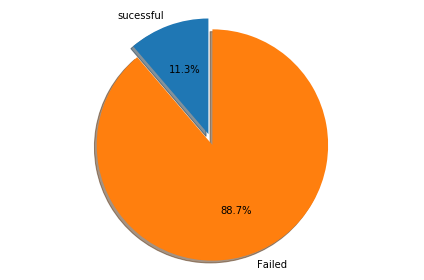

In [866]:
labels = ['sucessful', 'Failed']
sizes = [11.27, 88.73]
# only "explode" the 'successful' slice
explode = (0, 0.1,)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

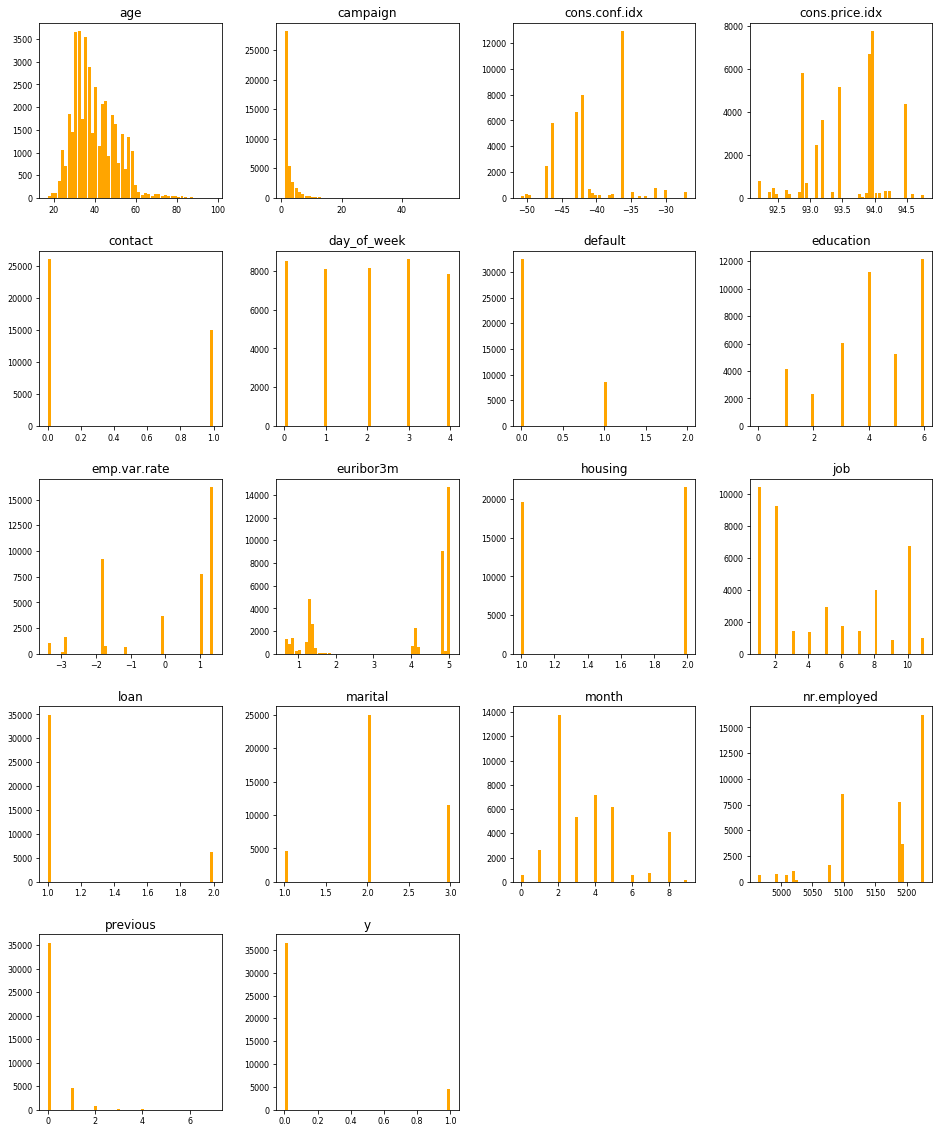

In [712]:
# Histograms below show the distributions of numeric data
train_cat = train.select_dtypes(include = ['float64', 'int64', 'int8'])
ax = train_cat.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8, log = False, grid=False, color='orange', zorder=2, rwidth=.9);

TO BE EDITED
The histograms above are unimodal. None of them are normal distributions. Age, campaign and previous are left skewed while consconf.inx, pdays, euribo3m nr, employed and empl var rate are right skewed

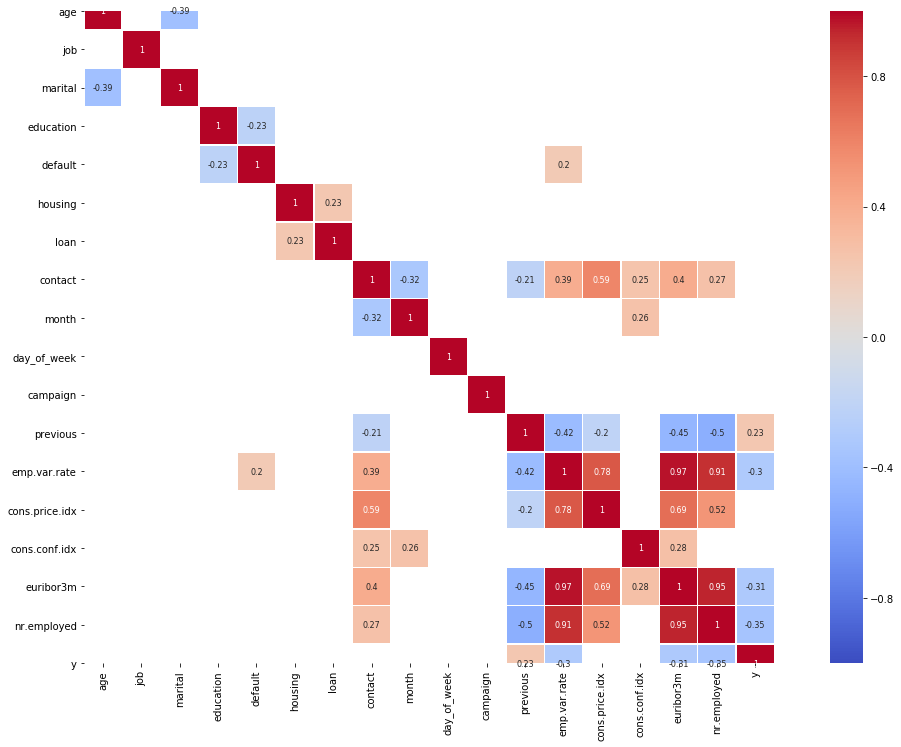

In [637]:
# The heatmap below gives a summary view of corelation

plt.subplots(figsize=(20,12))
corr = train.select_dtypes(include=['float64', 'int64', 'int8']).corr()
sns.heatmap(corr[(corr>=0.2)|(corr<=-0.2)], cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.4, 
annot=True, annot_kws={"size":8.00}, square=True);

Looking along dependent variable Y, the features most correlated are previous, emp.var.rate.euribor3m, and nr.employed

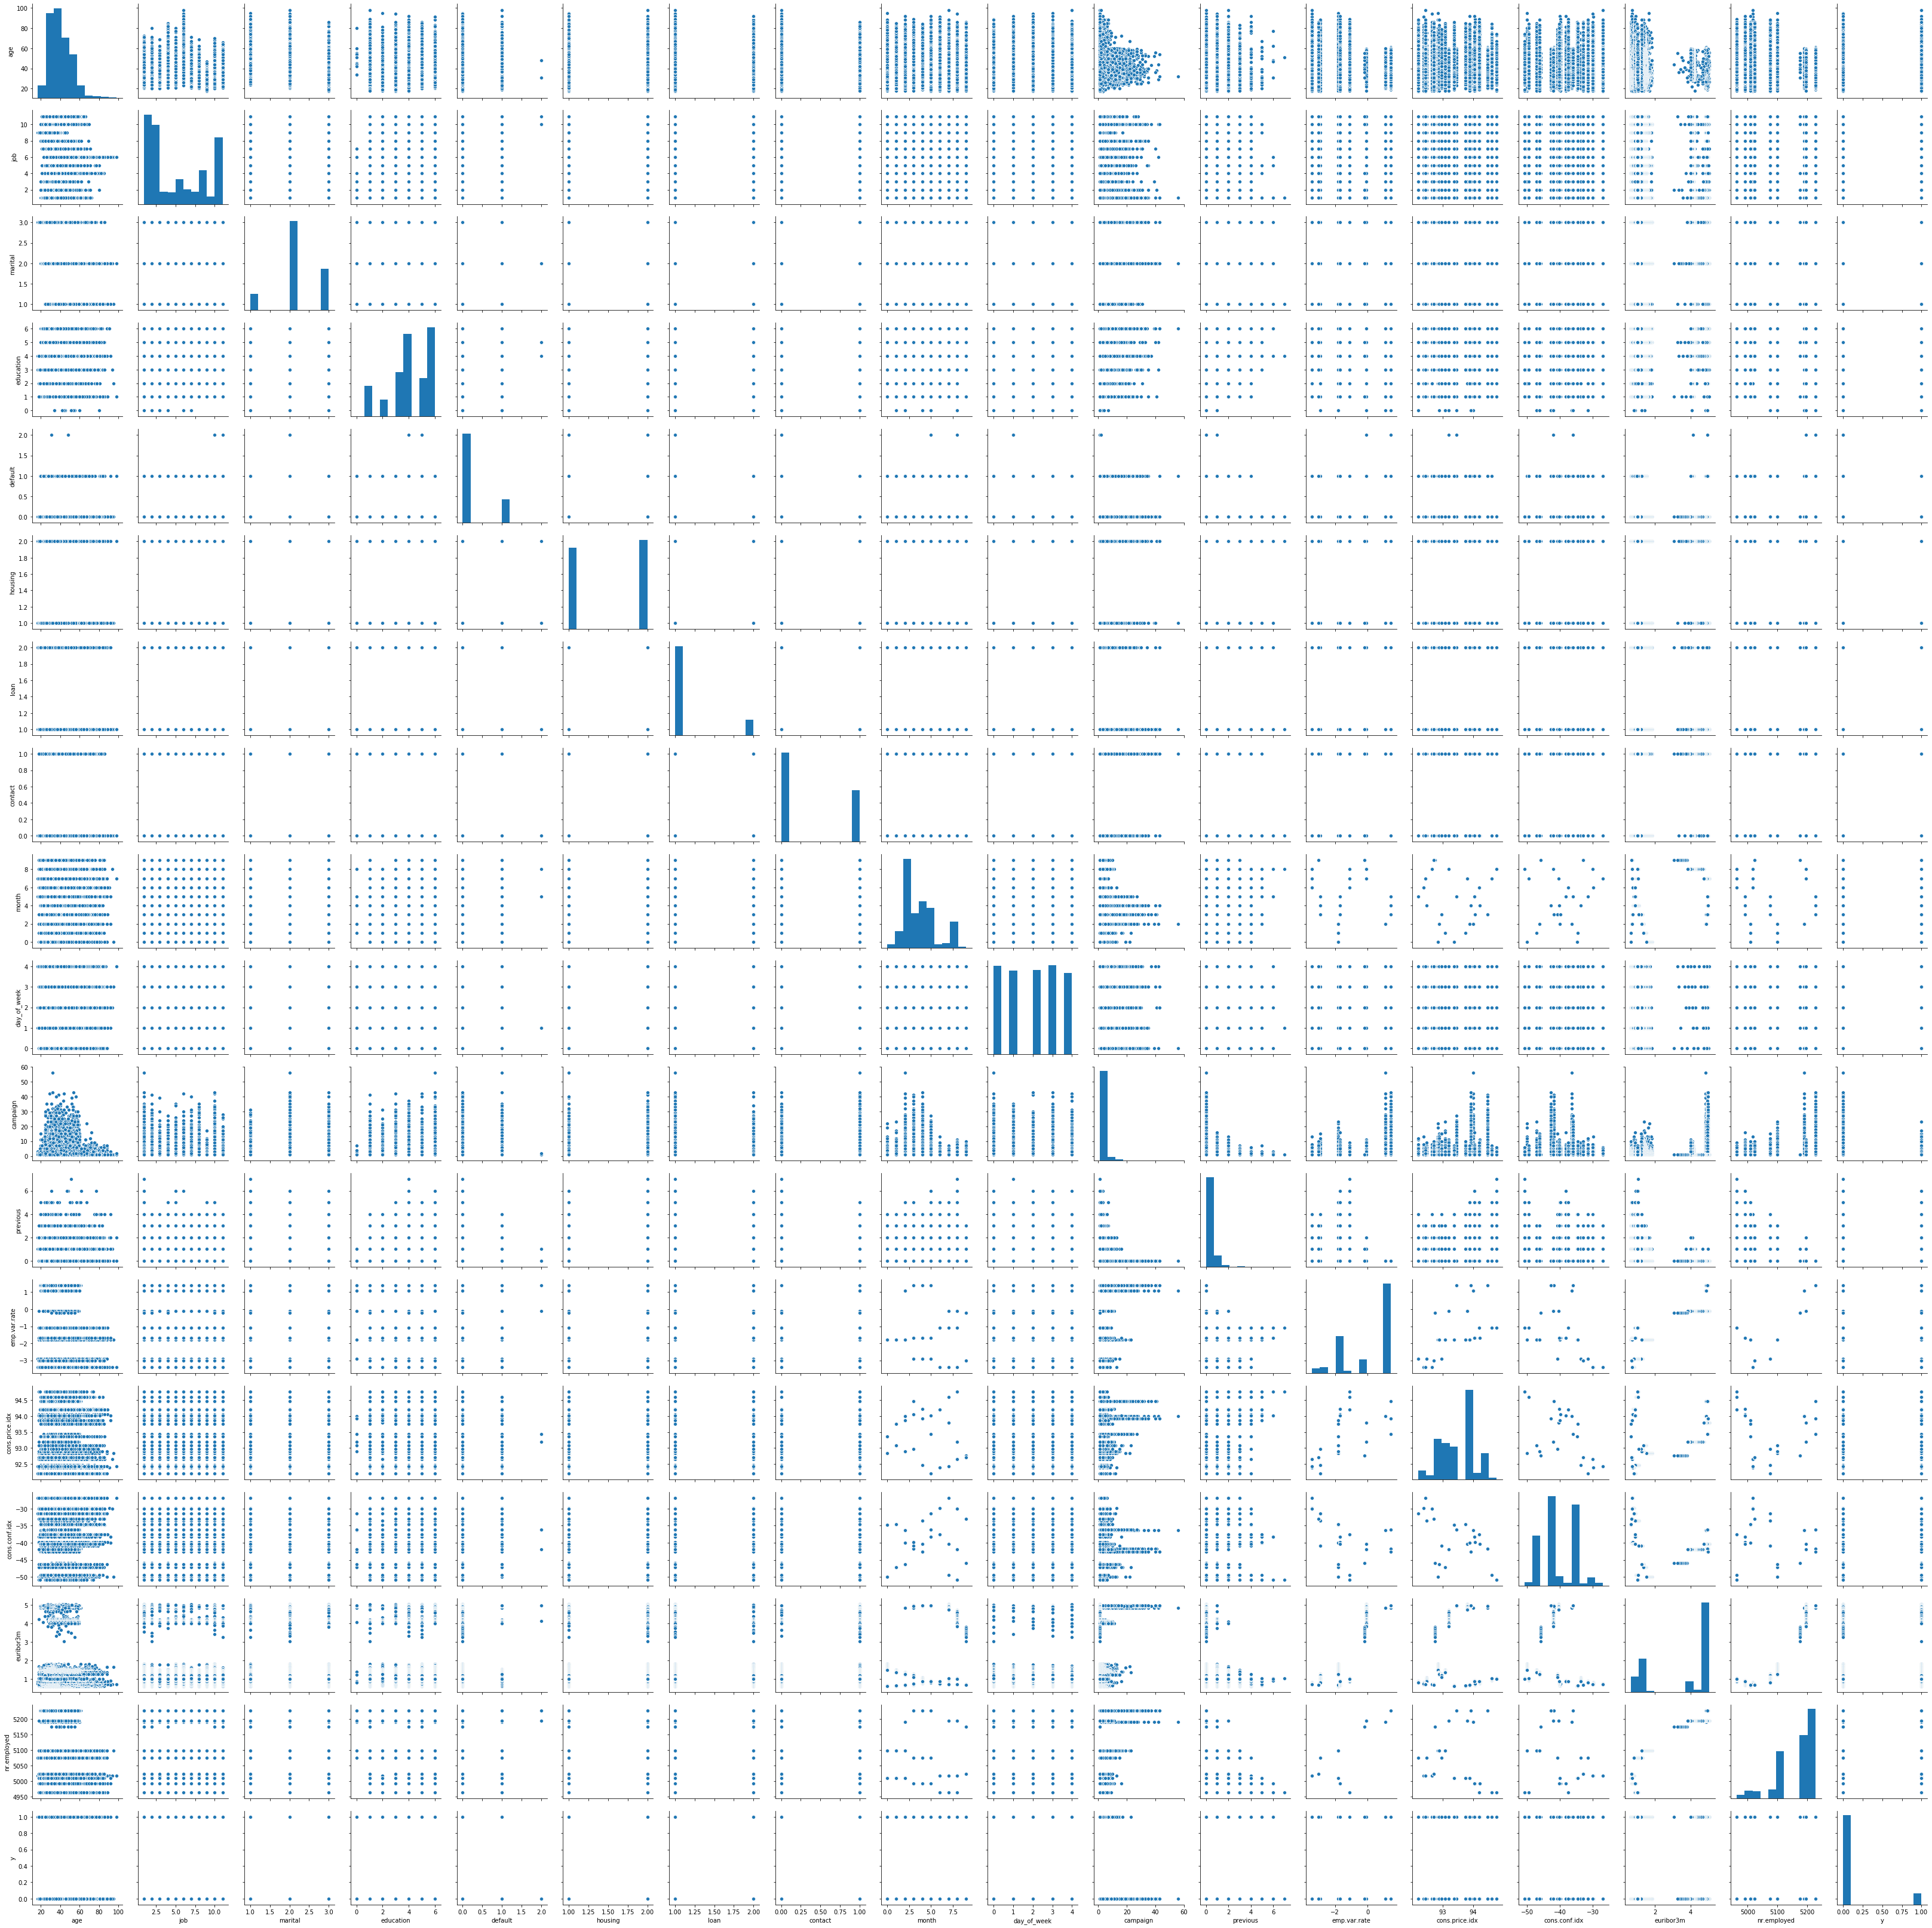

In [713]:
# Assess the correlation of different numeric variables to get a sense of correlation among the different variables
sns.pairplot(train)

The plots above show the actual correlation charts between different numeric data.

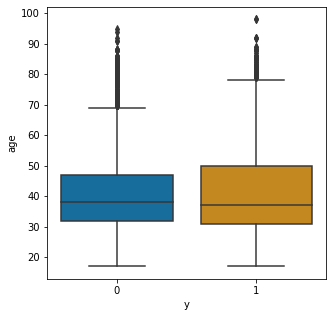

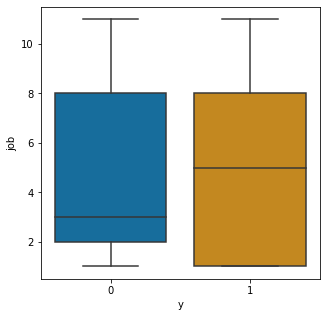

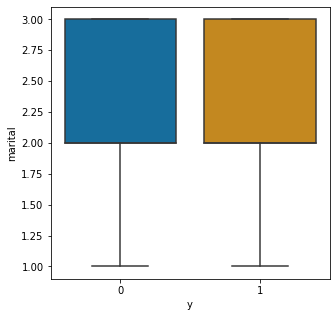

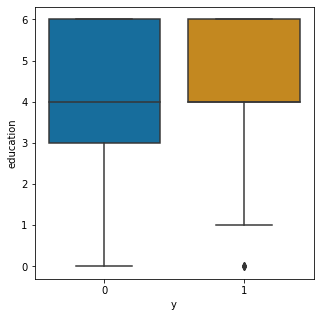

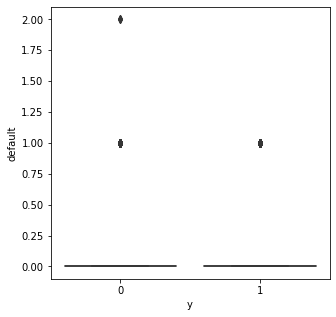

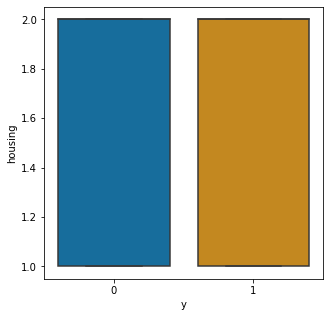

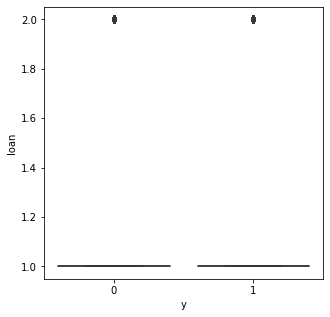

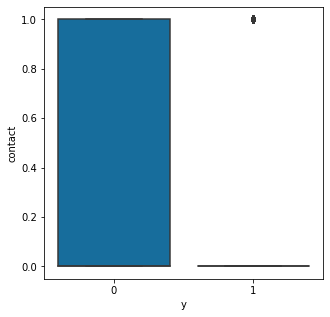

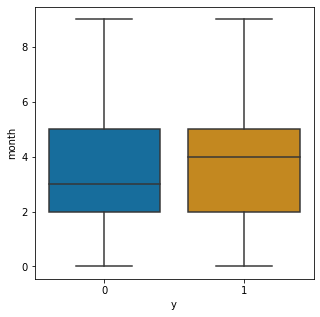

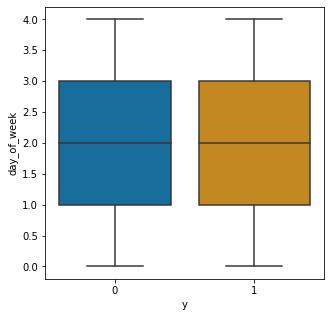

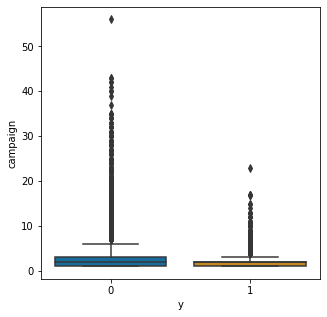

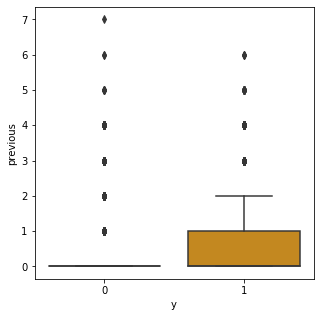

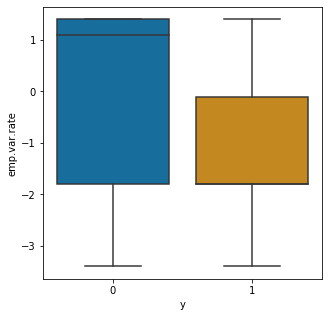

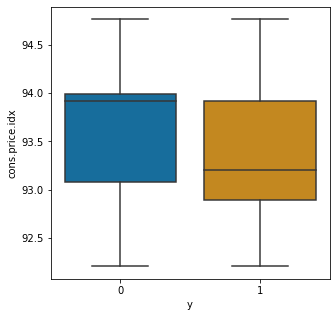

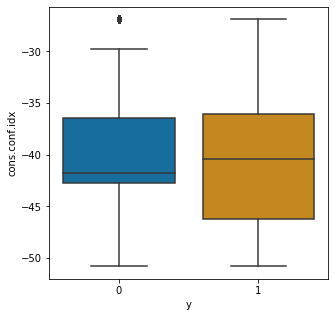

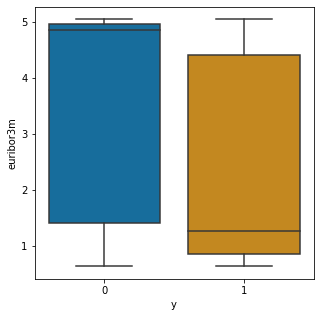

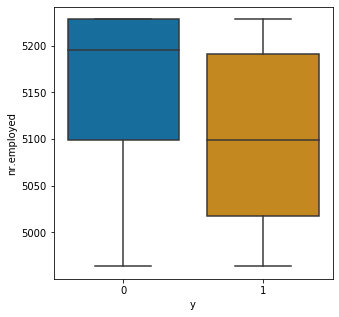

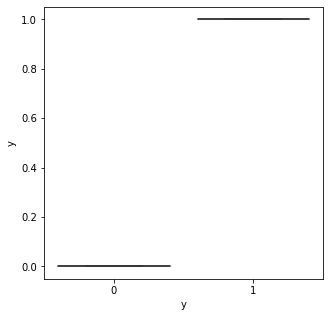

In [714]:
boxplot = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y']
for col in boxplot:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=col, x='y', data=train, palette="colorblind")